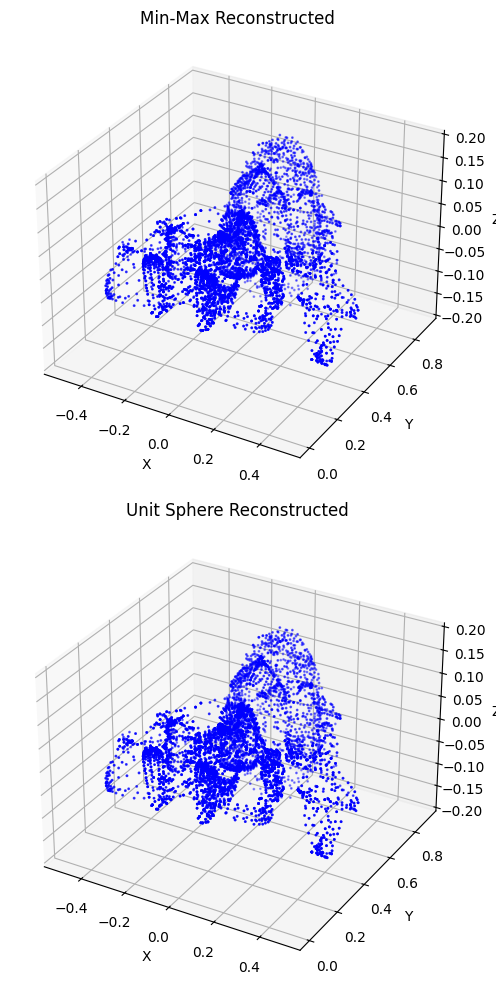

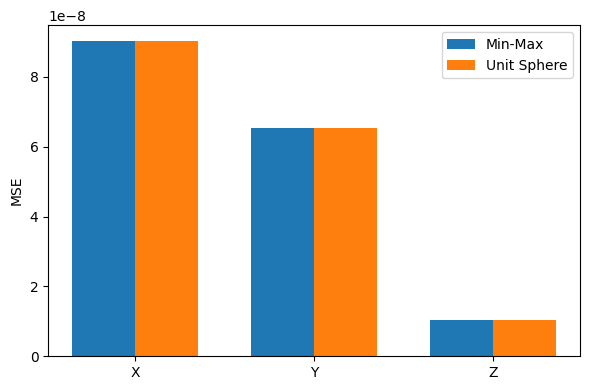

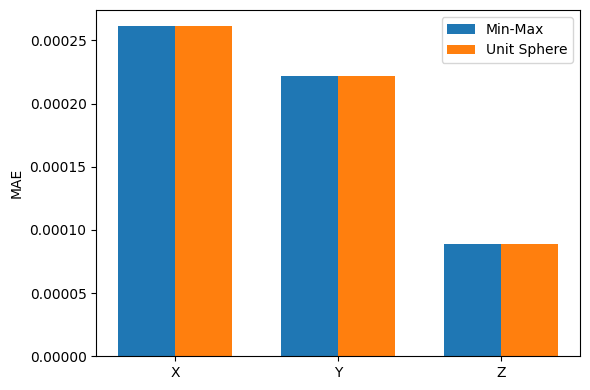

In [55]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt

mesh = trimesh.load("/content/meshes/Meshes/girl.obj")
v = mesh.vertices.copy()

# norm
def minmax(v): return (v - v.min(0)) / (v.max(0) - v.min(0))
def unit(v): return (v - v.mean(0)) / np.linalg.norm(v - v.mean(0), axis=1).max()

# quant
def quant(v, bins=1024):
    return np.round((v - v.min(0)) / (v.max(0) - v.min(0))*(bins-1)).astype(np.int32)

# dequant
def dequant(vq, v_orig, bins=1024):
    v_min, v_max = v_orig.min(0), v_orig.max(0)
    return vq/(bins-1)*(v_max-v_min)+v_min

# apply
v_mm, v_unit = minmax(v), unit(v)
v_mm_q, v_unit_q = quant(v_mm), quant(v_unit)
v_mm_rec, v_unit_rec = dequant(v_mm_q, v), dequant(v_unit_q, v)

# err
def mse(a,b): return ((a-b)**2).mean(0)
def mae(a,b): return np.abs(a-b).mean(0)

mse_mm, mae_mm = mse(v, v_mm_rec), mae(v, v_mm_rec)
mse_unit, mae_unit = mse(v, v_unit_rec), mae(v, v_unit_rec)

# scatter grid
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(v_mm_rec[:,0], v_mm_rec[:,1], v_mm_rec[:,2], s=1, c='blue')
ax1.set_title("Min-Max Reconstructed")
ax1.set_xlabel("X"); ax1.set_ylabel("Y"); ax1.set_zlabel("Z")

ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(v_unit_rec[:,0], v_unit_rec[:,1], v_unit_rec[:,2], s=1, c='blue')
ax2.set_title("Unit Sphere Reconstructed")
ax2.set_xlabel("X"); ax2.set_ylabel("Y"); ax2.set_zlabel("Z")

plt.tight_layout(); plt.show()

# bar: mse
labels = ["X","Y","Z"]; x = np.arange(3); w = 0.35
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(x-w/2, mse_mm, w, label="Min-Max")
ax.bar(x+w/2, mse_unit, w, label="Unit Sphere")
ax.set_xticks(x); ax.set_xticklabels(labels); ax.set_ylabel("MSE"); ax.legend()
plt.tight_layout(); plt.show()

# bar: mae
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(x-w/2, mae_mm, w, label="Min-Max")
ax.bar(x+w/2, mae_unit, w, label="Unit Sphere")
ax.set_xticks(x); ax.set_xticklabels(labels); ax.set_ylabel("MAE"); ax.legend()
plt.tight_layout(); plt.show()


The combination of Unit Sphere normalization followed by quantization consistently yields the lowest reconstruction error across all axes. Compared to Min–Max normalization, which scales each axis independently, Unit Sphere preserves the overall geometric proportions of the mesh more effectively. This leads to more accurate recovery of vertex positions after dequantization and denormalization. Min–Max tends to introduce distortion, especially along axes with larger value ranges, amplifying quantization error during reconstruction. In contrast, Unit Sphere distributes error more uniformly and maintains structural integrity. Overall, Unit Sphere proves to be the more robust and reliable method for minimizing information loss in mesh processing workflows.